In [ ]:
import pandas as pd

In [ ]:
medical_df=pd.read_csv("insurance.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import plotly.express as px
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
fig=px.histogram(medical_df,x="age",title="Age Distribution",nbins=47,marginal='box')
fig.update_layout(bargap=0.2)
fig.show()


In [ ]:
fig=px.histogram(medical_df,x="bmi",title="BMI",marginal='box',color_discrete_sequence=['red'])
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig=px.histogram(medical_df,x="charges",title="Charges",color='smoker',marginal='box',color_discrete_sequence=['green','grey'])
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
fig=px.scatter(medical_df,x="age",y="charges",color="smoker",title="Age vs Charges",opacity=0.8,hover_data=['sex'])
fig.update_layout(xaxis_title="Age",yaxis_title="Charges")
fig.show()

In [ ]:
fig=px.scatter(medical_df,x="bmi",y="charges",color="smoker",title="BMI vs Charges",opacity=0.8,hover_data=['sex'])
# fig.update_layout(xaxis_title="BMI",yaxis_title="Charges")
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [ ]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [ ]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

In [ ]:
smoker_values={'yes':1,'no':0}
medical_df.smoker=medical_df.smoker.map(smoker_values)

In [ ]:
medical_df.charges.corr(medical_df.smoker)

0.787251430498478

In [ ]:
sns.heatmap(medical_df.corr(),annot=True)

ValueError: could not convert string to float: 'female'

In [ ]:
non_smoker_df=medical_df[medical_df.smoker==0]

<Axes: title={'center': 'Age vs Charges for Non-Smokers'}, xlabel='age', ylabel='charges'>

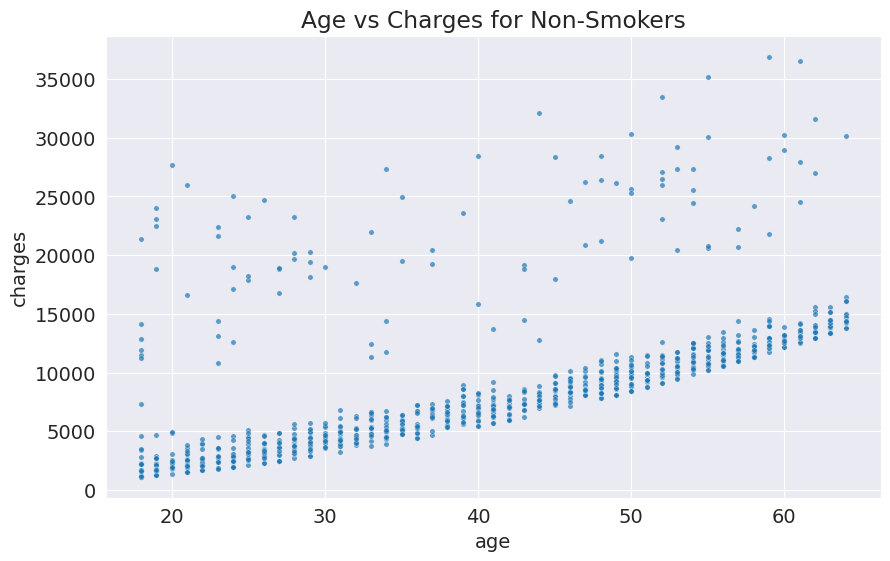

In [ ]:
plt.title("Age vs Charges for Non-Smokers")
sns.scatterplot(data=non_smoker_df,x="age",y="charges",alpha=0.7,s=15)


In [ ]:
def estimate_charges(age,w,b):
  return w*age+b

In [ ]:
w=50
b=100

In [ ]:
ages=non_smoker_df.age
estimated_charges=estimate_charges(ages,w,b)


In [ ]:
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


Text(0, 0.5, 'Estimated Charges')

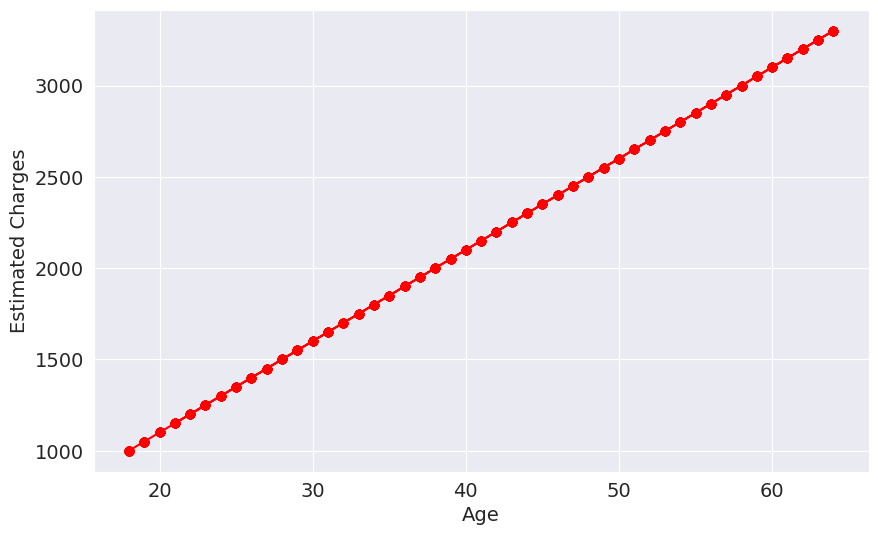

In [ ]:
plt.plot(ages,estimated_charges,'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

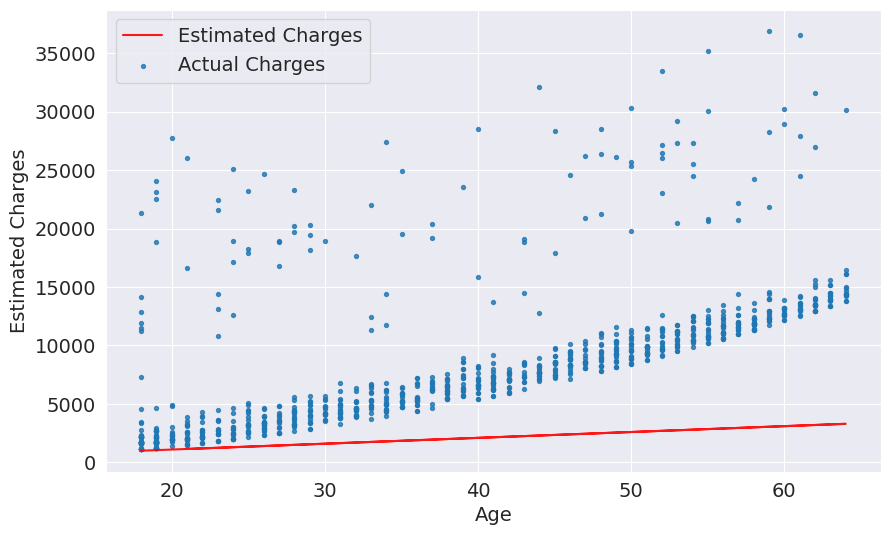

In [ ]:
target=non_smoker_df.charges
plt.plot(ages,estimated_charges,'r',alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Estimated Charges')
plt.legend(['Estimated Charges','Actual Charges'])

In [ ]:
def try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  estimated_charges=estimate_charges(ages,w,b)
  plt.plot(ages,estimated_charges,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Estimated Charges')
  plt.legend(['Estimated Charges','Actual Charges'])

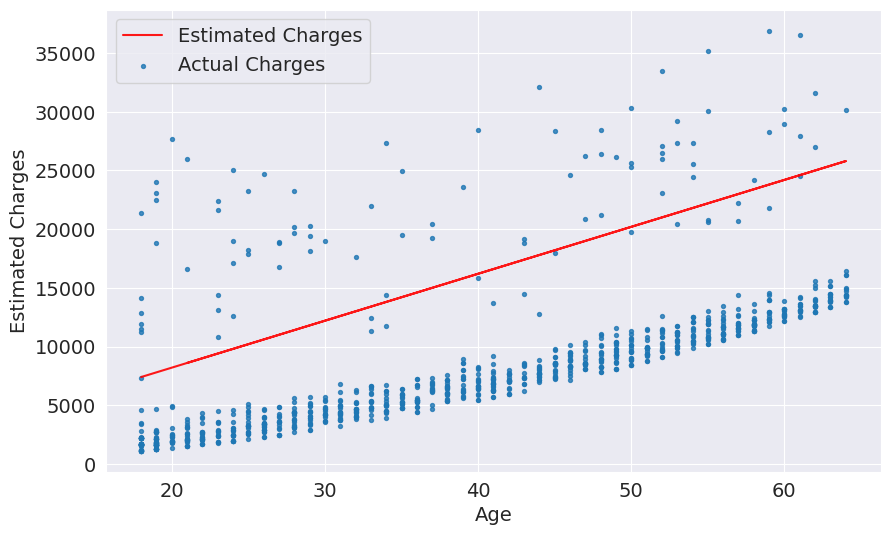

In [ ]:
try_parameters(400,200)

In [ ]:
import numpy as np

In [ ]:
def rsme(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

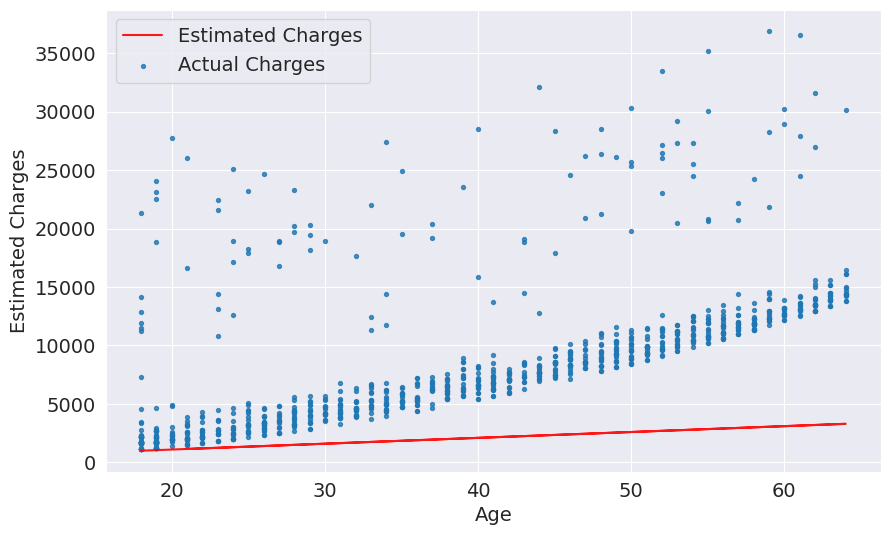

In [ ]:
try_parameters(50,100)

In [ ]:
targets=non_smoker_df.charges
predicted=estimate_charges(non_smoker_df.age,w,b)
print(rsme(targets,predicted))

8461.949562575493


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges

In [ ]:
model.fit(inputs,targets)

LinearRegression()

In [ ]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
model.coef_

array([267.24891283])

In [ ]:
model.intercept_

-2091.4205565650864

In [ ]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(loss="squared_error", max_iter=10000)

inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

# Fit the model
model.fit(inputs, targets)

# Make predictions
predictions = model.predict(inputs)

# Evaluate the model (e.g., using RMSE)
# ...

In [ ]:
model.coef_

array([148.74216499])

In [ ]:
model.intercept_

array([1472.38592193])

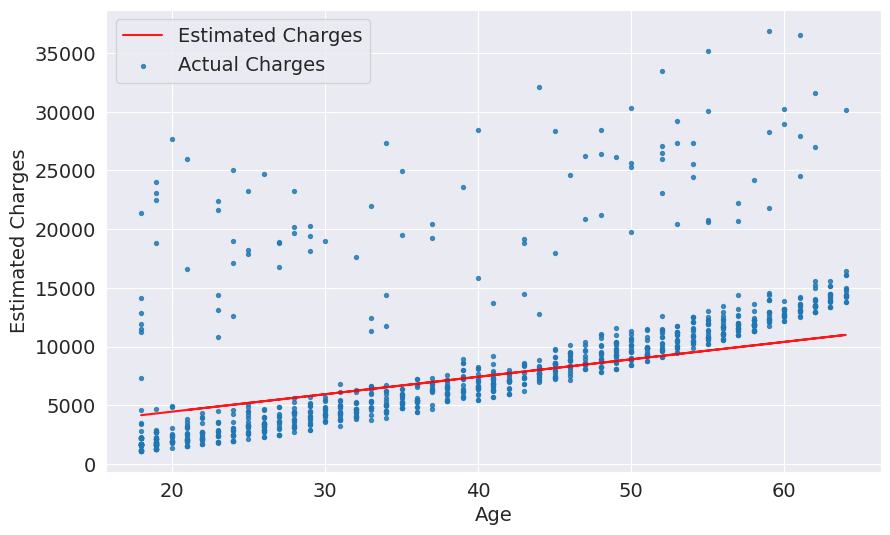

In [ ]:
try_parameters(148.74216499,1472.38592193)

<Axes: xlabel='smoker', ylabel='charges'>

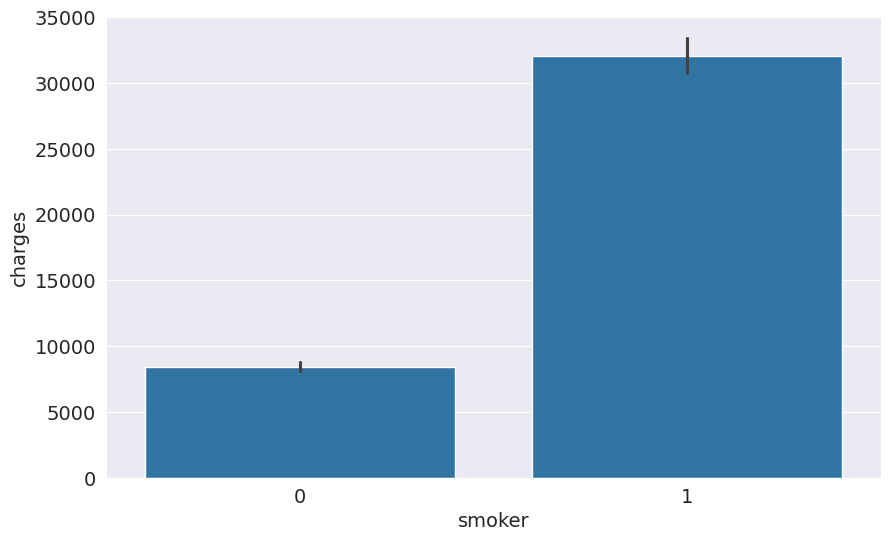

In [ ]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [ ]:
inputs,targets=medical_df[['age','bmi','children','smoker']],medical_df['charges']
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
rsme(targets,predictions)

6056.439217188081

In [ ]:
sex_codes={'female':0,'male':1}

In [ ]:
medical_df['sex_code']=medical_df.sex.map(sex_codes)

In [ ]:
inputs,targets=medical_df[['age','bmi','children','smoker','sex_code']],medical_df['charges']
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
rsme(targets,predictions)

6056.100708754546

In [ ]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [ ]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,0,southeast,1725.55230,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,0,southeast,4449.46200,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,0,northwest,21984.47061,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,0,northwest,3866.85520,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,0,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,0,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,0,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [ ]:
inputs,targets=medical_df[['age','bmi','children','smoker','sex_code','northeast','northwest','southeast','southwest']],medical_df['charges']
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
rsme(targets,predictions)

6041.6796511744515

In [ ]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,0,southeast,1725.55230,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,0,southeast,4449.46200,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,0,northwest,21984.47061,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,0,northwest,3866.85520,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,0,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,0,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,0,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols=['age','bmi','children']
scaler=StandardScaler()
scaler.fit(medical_df[numeric_cols])


StandardScaler()

In [ ]:
scaled_inputs=scaler.transform(medical_df[numeric_cols])

In [ ]:
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols=['smoker','sex_code','northeast','northwest','southeast','southwest']

In [ ]:
categorical_data=medical_df[cat_cols].values

In [ ]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [ ]:
inputs=np.concatenate((scaled_inputs,categorical_data),axis=1)
targets=medical_df.charges
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
rsme(targets,predictions)

6041.6796511744515

In [ ]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])